In [1]:
import pandas as pd
import numpy as np

# Load the dataset from the CSV file
df = pd.read_csv('housing.csv')

# 1. View the first few rows
print("--- First 5 Rows ---")
print(df.head())

# 2. Check data types and non-null counts
print("\n--- Data Info ---")
df.info()

# 3. Get descriptive statistics
print("\n--- Statistical Summary ---")
print(df.describe())

# 4. Identify missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

--- First 5 Rows ---
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

--- Data Info ---
<class 'pandas.core.frame.DataFrame

In [2]:
# 1. Handle Missing Values: Fill 'total_bedrooms' with the median
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

# 2. Feature Engineering: Create new features for more context
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# 3. Categorical Feature Encoding: Convert 'ocean_proximity' to numbers
# pd.get_dummies creates new columns for each category
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

/var/folders/tc/r_9v6dkj5pj7c0ymq4f7hsyr0000gn/T/ipykernel_50317/2262157087.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


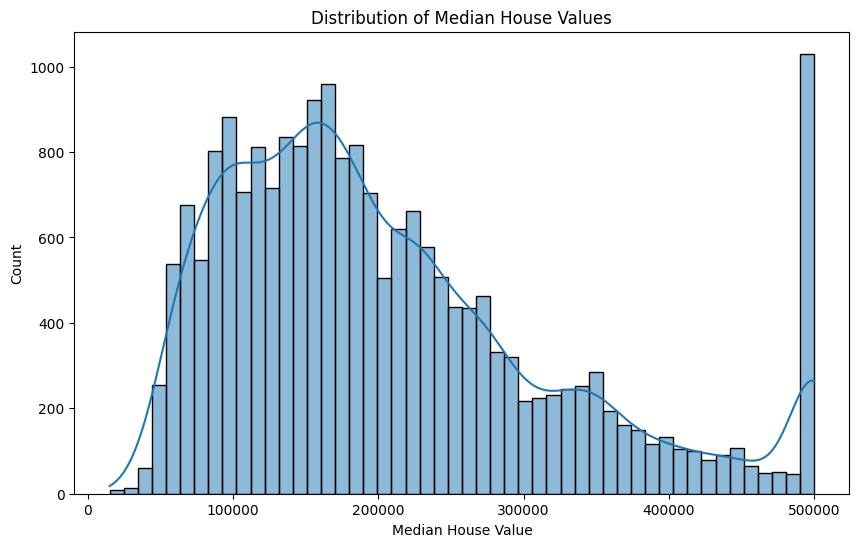

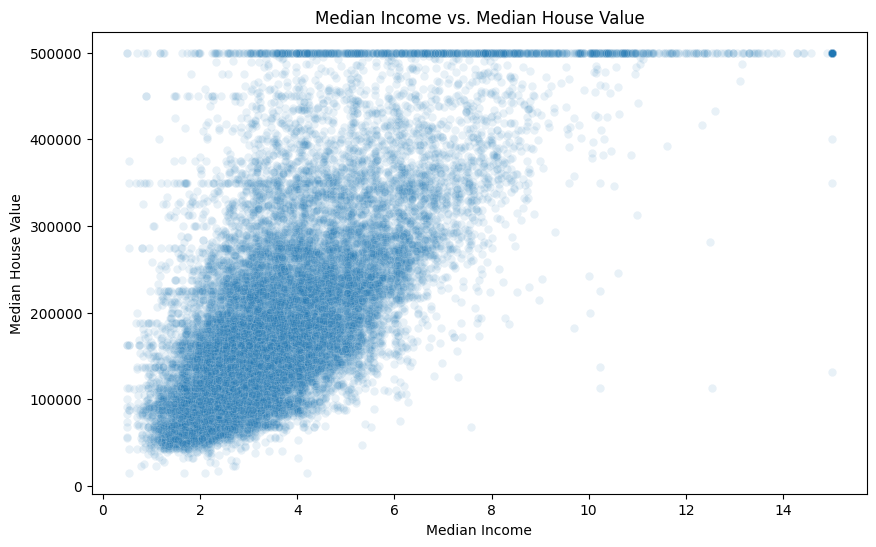

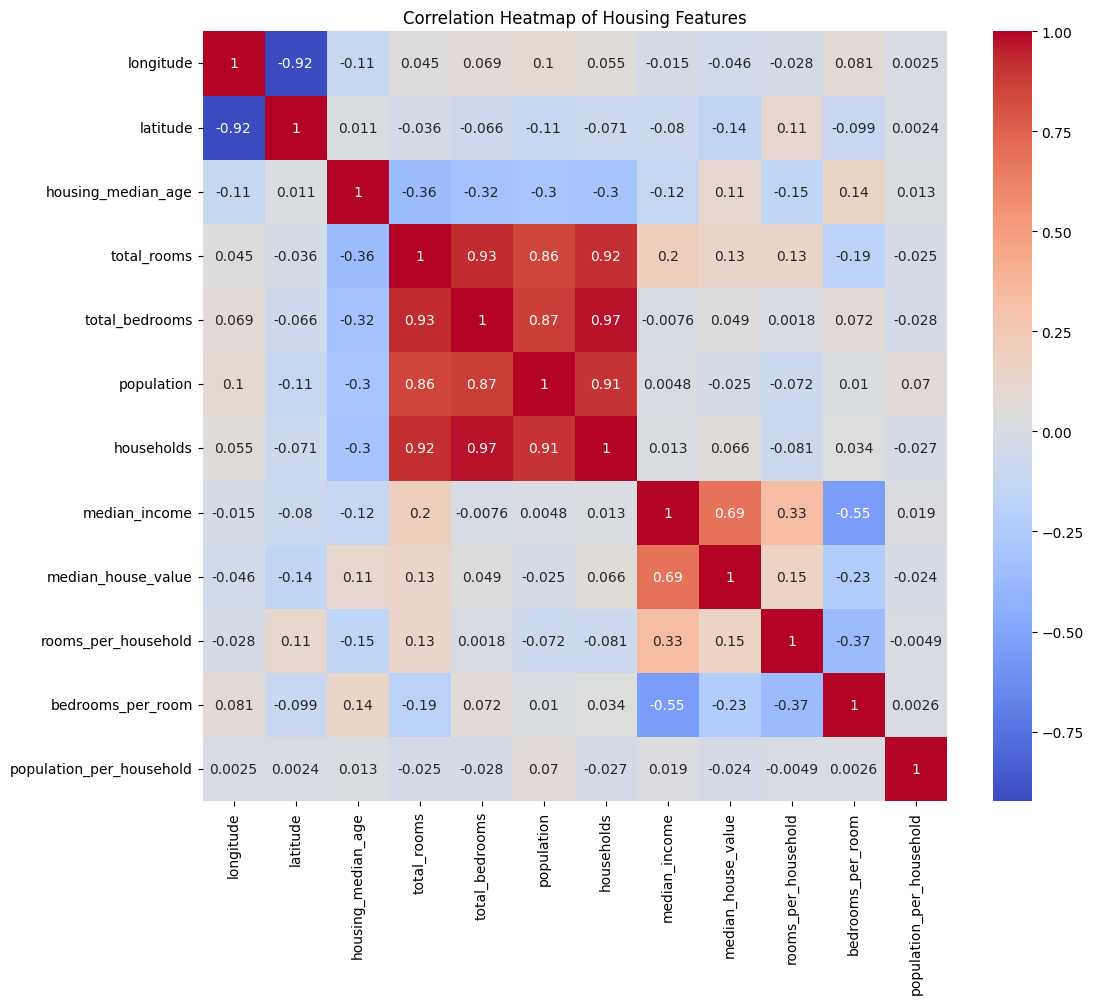

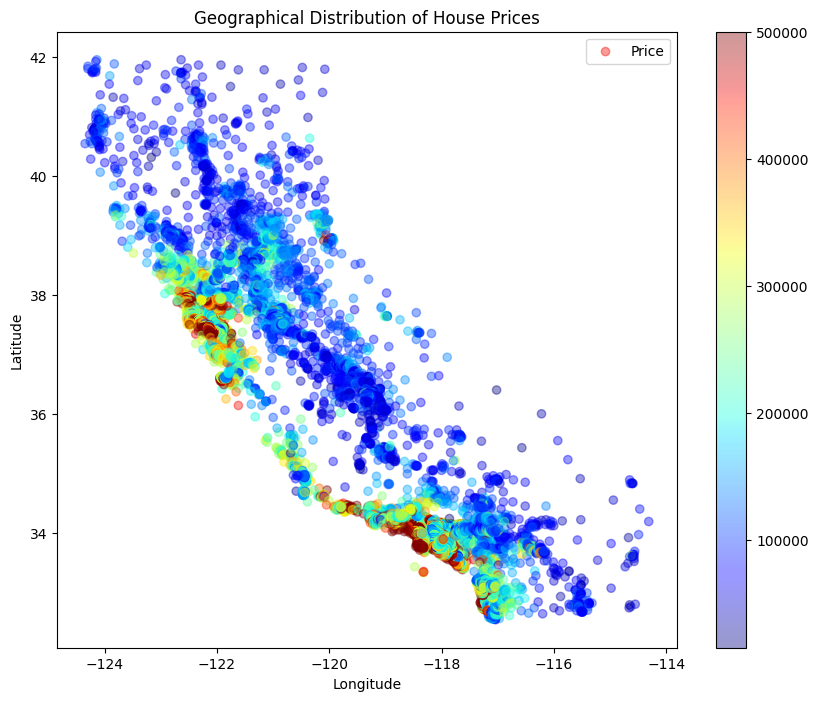

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Target Variable Distribution: Plot a histogram of the house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.show()

# 2. Feature-Target Relationships: Median Income vs. House Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.1)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Housing Features')
plt.show()

# 4. Geographical Plot: Visualize house prices on a map of California
plt.figure(figsize=(10, 8))
plt.scatter(df_encoded['longitude'], df_encoded['latitude'], alpha=0.4,
            c=df_encoded['median_house_value'], cmap=plt.get_cmap('jet'), label='Price')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of House Prices')
plt.legend()
plt.show()

--- Model training complete ---

--- Model Evaluation ---
Mean Absolute Error (MAE): $50,888.66
Root Mean Squared Error (RMSE): $72,668.54
R-squared (R²): 0.60


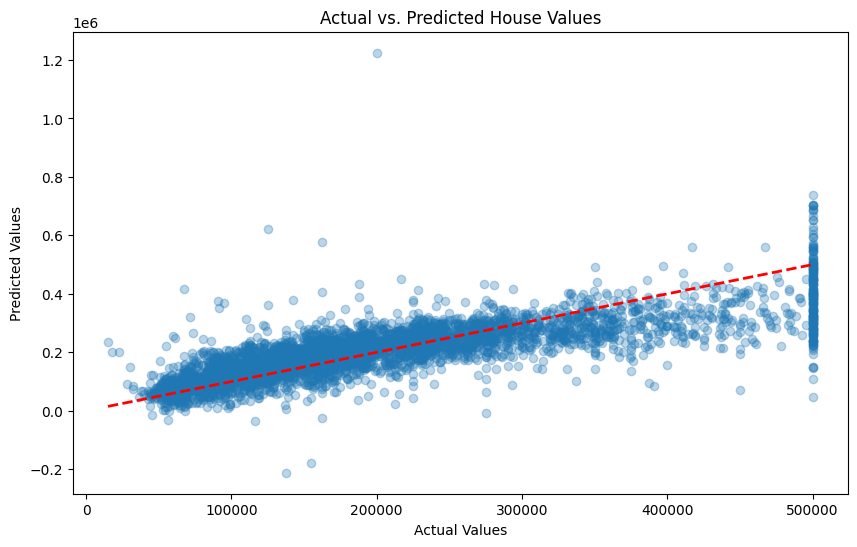

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Define Features (X) and Target (y)
# We drop the original 'median_house_value' to create our feature set X
X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

# 2. Split Data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

print("--- Model training complete ---")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Make Predictions on the test set
y_pred = model.predict(X_test)

# 2. Evaluate Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R²): {r2:.2f}")

# 3. Visualize Predictions vs. Actuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted House Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()